In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
import pandas as pd
import math as mt

from IPython.display import clear_output
from src import spotify, dp, utils, DB

db = DB()

## 사용자 메일 박스 조회

In [4]:
mail_box_id = "6241924d2aaa4bb999f6d5ca"

tracks = db.get_mail_box(mail_box_id)
tracks.head()

,id,name,artists,artists_name
0,2FWquqPNxte8iqZ3ATQG0p,All I Wanna Do (K) (Feat. Hoody & Loco),4XDi67ZENZcbfKnvMnTYsI,Jay Park
1,57ziFwpzuFkJi5nP91qnl4,YACHT (k) (Feat. Sik-K),4XDi67ZENZcbfKnvMnTYsI,Jay Park
2,3fZWliK6TSGwx2feMCnu2Z,아름다워,3hvinNZRzTLoREmqFiKr1b,CHANGMO


## 사용자에게 추천된 음악 확인

In [5]:
reco_tracks = db.get_mail(mail_box_id)
reco_tracks.head()

,id,name,artists,artists_name
0,2xYnqYBNL62ypPiA0wjD0s,AUTOMATIC,0LyfQWJT6nXafLPZqxe9Of,Various Artists
1,6z1kLsntE7FuzKZHZWrXYN,instagram,3eCd0TZrBPm2n9cDG6yWfF,DEAN
2,7EBxRB5zybo2zutJuiAwoF,WATER (Prod. by GooseBumps),5DIi2JWfQPTKffaVBlIYRn,Sik-K
3,4Cdyx3bs8mMYVJWP3wHPXj,On Rainy Days,1Pr9gT0veB2tgcisQeIGoC,Beast
4,7BKLCZ1jbUBVqRi2FVlTVw,Closer,"69GGBxA162lTqCwzJG5jLp,26VFTg2z8YR0cCuwLzESi2","The Chainsmokers,Halsey"


## 사용자가 맘에 들었던 음악 Select (Random 하게)

In [6]:
sel_tracks = reco_tracks.sample(n=mt.floor(len(reco_tracks) * 0.075))
db.new_mail_box_seed(mail_box_id, sel_tracks)

sel_tracks.head()

,id,name,artists,artists_name
33,4Z8usgSdQ0tuPjp5GDTzVG,Boom Di Boom Di - Mike Cip Album mix,7qKWQnE3S7v8m3rLwMVdGg,SKULL
39,0EYOhg4jMf7hCLeQIxlvKL,gold (Feat. Dean),0dTj3SqwE8kPnCzyzvYzhT,offonoff
53,7CkjU55ROZSwb95dzGan0o,Officially Missing You,5VxfguafjfSdJcN10ACVZe,Geeks
56,2GyA33q5rti5IxkMQemRDH,I Know What You Did Last Summer,7n2wHs1TKAczGzO7Dd2rGr,Shawn Mendes
45,49VzL5oBsUICN7U34T98b9,Instinct (feat. MadeinTYO),7mDU6nMUJnOSY2Hkjz5oqM,Roy Woods


## 재추천

In [7]:
# 1. Get Token
token = spotify.get_token()

genres = spotify.get_genres(token, sel_tracks)

og_features = spotify.get_features(token, tracks)
reply_features = spotify.get_features(token, sel_tracks)
db.observe_seed_zone(reply_features)

In [8]:
recos = spotify.get_recommend(sel_tracks,reply_features, genres, token,
                             og=tracks)
reco_features = spotify.get_features(token, recos)
reco_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,6FbQHcybxoJVR6sfnc6wqJ,0.765,0.920,5,-3.639,0.2080,0.1520,0.0,0.1540,0.622,92.006
1,3Vo4wInECJQuz9BIBMOu8i,0.704,0.859,5,-4.877,0.0996,0.0185,0.0,0.0215,0.926,105.115
2,4QeoDcR16IHpmmgFGQDrCp,0.720,0.727,5,-3.882,0.0489,0.0556,0.0,0.1380,0.481,99.994
3,5tf1VVWniHgryyumXyJM7w,0.636,0.815,5,-5.098,0.0581,0.0185,0.0,0.1630,0.636,123.063
4,0X5t0CPnMBG23HfRewbr3G,0.764,0.852,5,-4.318,0.1010,0.0194,0.0,0.1140,0.626,104.967


In [9]:
# 합치기
sel_tracks = pd.concat([tracks,sel_tracks], ignore_index=True)
features = pd.concat([og_features, reply_features], ignore_index=True)

features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2FWquqPNxte8iqZ3ATQG0p,0.403,0.724,8,-6.064,0.2460,0.3770,0.000000,0.0927,0.428,97.133
1,57ziFwpzuFkJi5nP91qnl4,0.726,0.772,10,-4.374,0.1130,0.4510,0.000000,0.1950,0.778,80.017
2,3fZWliK6TSGwx2feMCnu2Z,0.737,0.668,9,-5.675,0.0423,0.0390,0.000000,0.0800,0.344,87.938
3,4Z8usgSdQ0tuPjp5GDTzVG,0.764,0.852,5,-4.318,0.1010,0.0194,0.000000,0.1140,0.626,104.967
4,0EYOhg4jMf7hCLeQIxlvKL,0.883,0.647,10,-8.200,0.0799,0.5700,0.000001,0.3590,0.729,117.016


In [10]:
norm_features = dp.make_norm(features, reco_features)

norm_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2FWquqPNxte8iqZ3ATQG0p,0.196302,0.659121,0.727273,0.504228,0.509692,0.430019,0.000000,0.111862,0.403812,0.197955
1,57ziFwpzuFkJi5nP91qnl4,0.655761,0.723036,0.909091,0.632970,0.206385,0.514545,0.000000,0.272584,0.791667,0.059066
2,3fZWliK6TSGwx2feMCnu2Z,0.671408,0.584554,0.818182,0.533862,0.045154,0.043940,0.000000,0.091909,0.310727,0.123342
3,4Z8usgSdQ0tuPjp5GDTzVG,0.709815,0.829561,0.454545,0.637236,0.179019,0.021552,0.000000,0.145326,0.623227,0.261525
4,0EYOhg4jMf7hCLeQIxlvKL,0.879090,0.556591,0.909091,0.341510,0.130901,0.650473,0.000004,0.530244,0.737367,0.359297


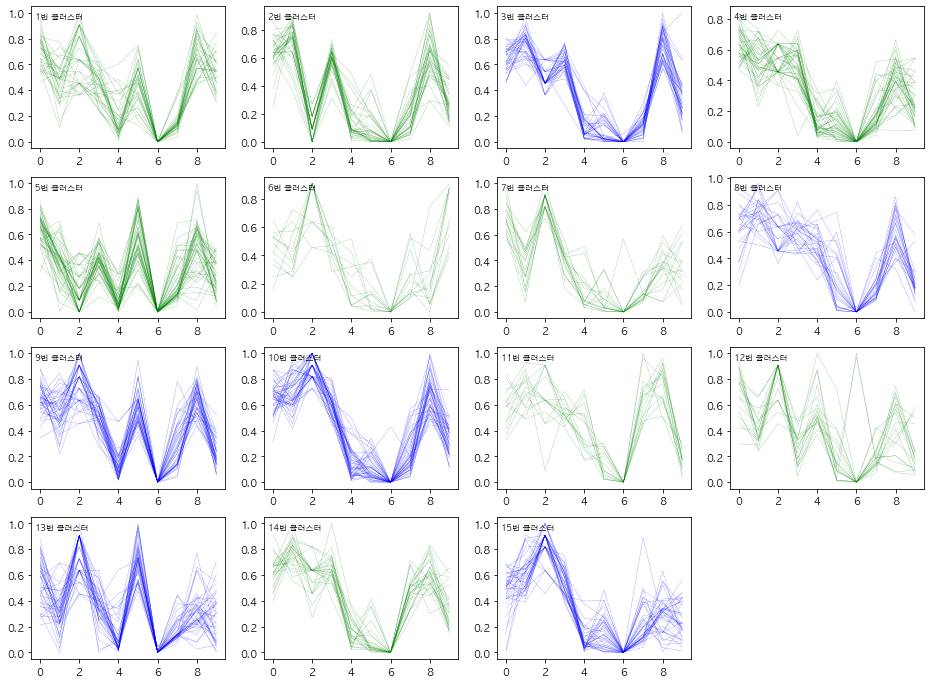

In [11]:
kmeans = utils.KMeans(
    datas=norm_features
)
kmeans.run(early_stop_cnt=5)
clear_output(wait=True)

utils.visual_cluster_data(sel_tracks, kmeans)
_filtering_music_list = dp.music_filtering(sel_tracks, kmeans)

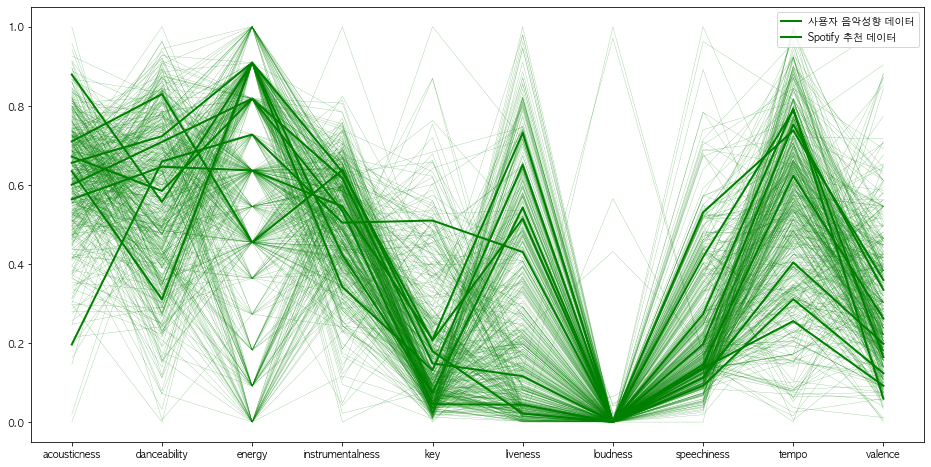

In [12]:
utils.visual_norm_data(sel_tracks, norm_features)

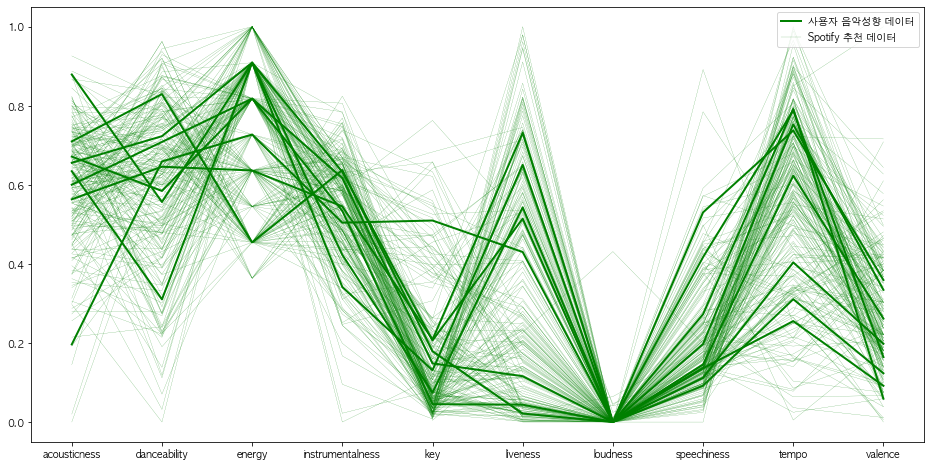

,id,name,artists,artists_name
0,6FbQHcybxoJVR6sfnc6wqJ,What If,61MMiylth1injW39oZBuYB,San E
1,3Vo4wInECJQuz9BIBMOu8i,Finesse - Remix; feat. Cardi B,"0du5cEVh5yTK9QJze8zA0C,4kYSro6naA4h99UJvo89HB","Bruno Mars,Cardi B"
3,5tf1VVWniHgryyumXyJM7w,Sugar (feat. Francesco Yates),3t5xRXzsuZmMDkQzgOX35S,Robin Schulz
4,0X5t0CPnMBG23HfRewbr3G,Boom Di Boom Di - Mike Cip Album mix,7qKWQnE3S7v8m3rLwMVdGg,SKULL
6,2igbKtoBMXdYgYPkCpl0V4,Body Moves,6T5tfhQCknKG4UnH90qGnz,DNCE


In [13]:
filter_music = norm_features.set_index("id").loc[_filtering_music_list].reset_index()
reco_musics = [_ in _filtering_music_list for _ in recos['id']]

utils.visual_norm_data(sel_tracks, filter_music)
recos[reco_musics].head()

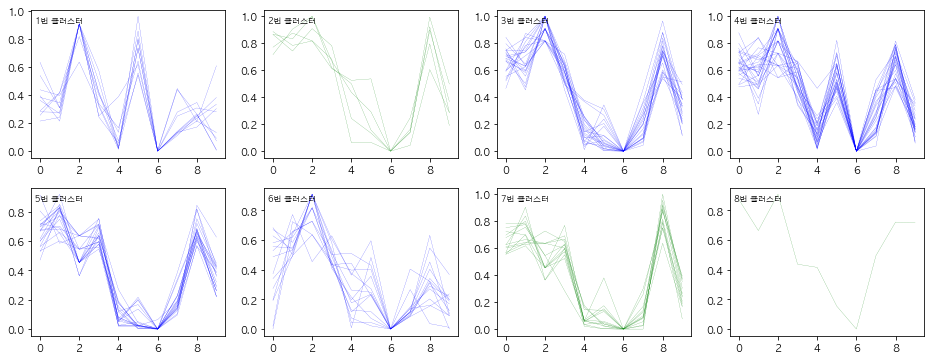

In [14]:
filter_music_list, kmeans = utils.reco_KMeans(norm_features, sel_tracks)

utils.visual_cluster_data(sel_tracks, kmeans)

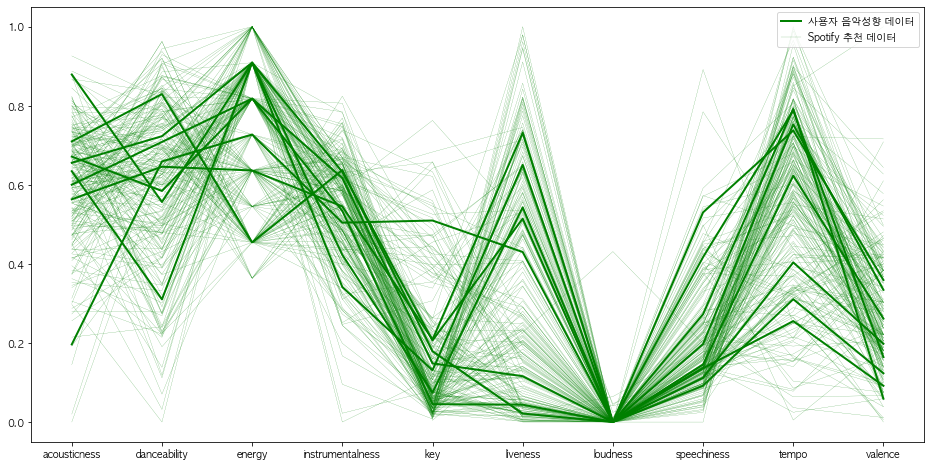

,id,name,artists,artists_name
0,6FbQHcybxoJVR6sfnc6wqJ,What If,61MMiylth1injW39oZBuYB,San E
1,3Vo4wInECJQuz9BIBMOu8i,Finesse - Remix; feat. Cardi B,"0du5cEVh5yTK9QJze8zA0C,4kYSro6naA4h99UJvo89HB","Bruno Mars,Cardi B"
3,5tf1VVWniHgryyumXyJM7w,Sugar (feat. Francesco Yates),3t5xRXzsuZmMDkQzgOX35S,Robin Schulz
4,0X5t0CPnMBG23HfRewbr3G,Boom Di Boom Di - Mike Cip Album mix,7qKWQnE3S7v8m3rLwMVdGg,SKULL
6,2igbKtoBMXdYgYPkCpl0V4,Body Moves,6T5tfhQCknKG4UnH90qGnz,DNCE


In [15]:
filter_music = norm_features.set_index("id").loc[_filtering_music_list].reset_index()
reco_musics = [_ in _filtering_music_list for _ in recos['id']]

utils.visual_norm_data(sel_tracks, filter_music)
recos[reco_musics].head()

In [16]:
db.new_mail(mail_box_id,
           recos[reco_musics])

In [17]:
genres

,artists,genres
0,7qKWQnE3S7v8m3rLwMVdGg,pop
1,0dTj3SqwE8kPnCzyzvYzhT,"chill,k-pop"
2,5VxfguafjfSdJcN10ACVZe,"k-pop,hip-hop,pop"
3,7n2wHs1TKAczGzO7Dd2rGr,pop
4,7mDU6nMUJnOSY2Hkjz5oqM,"hip-hop,pop"


In [18]:
spotify.get_genres(token,recos[reco_musics])

KeyError: 'artists'